In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [17]:
# New Antecedent/Consequent objects hold universe variables and membership
temparture = ctrl.Antecedent(np.arange(0, 110, 1), 'temparture') # Temparture is in Fahrenheit
cloudiness = ctrl.Antecedent(np.arange(0,100,1), 'cloudiness') # Cloudiness is in percentage
speed = ctrl.Consequent(np.arange(0, 100, 1), 'speed') # Speed is in mph

B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


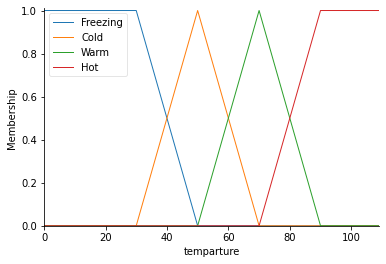

In [18]:
# Create fuzzy membership functions for temparture
temparture['Freezing'] = fuzz.trapmf(temparture.universe, [0, 0, 30, 50]) # trampf creates trapezoidal membership function
temparture['Cold'] = fuzz.trimf(temparture.universe, [30, 50, 70]) # trimf creates triangular membership function
temparture['Warm'] = fuzz.trimf(temparture.universe, [50, 70, 90])
temparture['Hot'] = fuzz.trapmf(temparture.universe, [70, 90, 110, 110])
temparture.view()

B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


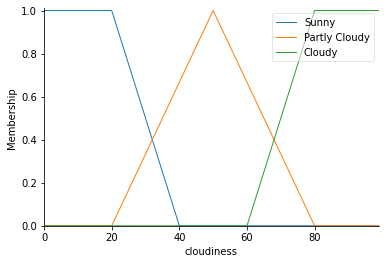

In [19]:
# Create fuzzy membership functions for cloudiness
cloudiness['Sunny'] = fuzz.trapmf(cloudiness.universe, [0, 0, 20, 40])
cloudiness['Partly Cloudy'] = fuzz.trimf(cloudiness.universe, [20, 50, 80])
cloudiness['Cloudy'] = fuzz.trapmf(cloudiness.universe, [60, 80, 100, 100])
cloudiness.view()

B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


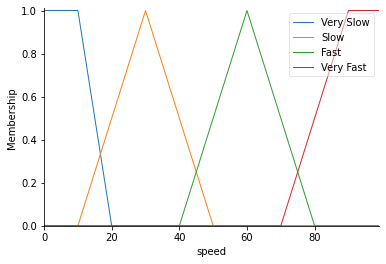

In [20]:
speed['Very Slow'] = fuzz.trapmf(speed.universe, [0, 0, 10, 20])
speed['Slow'] = fuzz.trimf(speed.universe, [10, 30, 50])
speed['Fast'] = fuzz.trimf(speed.universe, [40, 60, 80])
speed['Very Fast'] = fuzz.trapmf(speed.universe, [70, 90, 100, 100])
speed.view()

In [21]:
# Rules to calculate speed
rule1 = ctrl.Rule(temparture['Freezing'] & cloudiness['Cloudy'], speed['Very Slow'])
rule2 = ctrl.Rule(temparture['Freezing'] & cloudiness['Partly Cloudy'], speed['Slow'])
rule3 = ctrl.Rule(temparture['Freezing'] & cloudiness['Sunny'], speed['Slow'])
rule4 = ctrl.Rule(temparture['Cold'] & cloudiness['Cloudy'], speed['Slow'])
rule5 = ctrl.Rule(temparture['Cold'] & cloudiness['Partly Cloudy'], speed['Fast'])
rule6 = ctrl.Rule(temparture['Cold'] & cloudiness['Sunny'], speed['Fast'])
rule7 = ctrl.Rule(temparture['Warm'] & cloudiness['Cloudy'], speed['Slow'])
rule8 = ctrl.Rule(temparture['Warm'] & cloudiness['Partly Cloudy'], speed['Fast'])
rule9 = ctrl.Rule(temparture['Warm'] & cloudiness['Sunny'], speed['Fast'])
rule10 = ctrl.Rule(temparture['Hot'] & cloudiness['Cloudy'], speed['Fast'])
rule11 = ctrl.Rule(temparture['Hot'] & cloudiness['Partly Cloudy'], speed['Very Fast'])
rule12 = ctrl.Rule(temparture['Hot'] & cloudiness['Sunny'], speed['Very Fast'])

In [22]:
# Create the fuzzy control system
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
speed_ctrl_sim = ctrl.ControlSystemSimulation(speed_ctrl)

Calculated Speed:  60.0


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


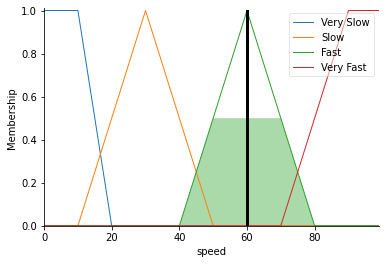

In [23]:
# Execute Example
speed_ctrl_sim.input['temparture'] = 60
speed_ctrl_sim.input['cloudiness'] = 50
speed_ctrl_sim.compute()
print("Calculated Speed: ", speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)

Calculated Speed:  34.78758908395625


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


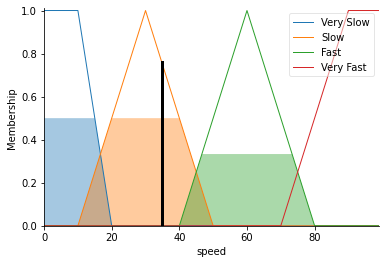

In [24]:
speed_ctrl_sim.input['temparture'] = 40
speed_ctrl_sim.input['cloudiness'] = 70
speed_ctrl_sim.compute()
print("Calculated Speed: ",speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)

Calculated Speed:  21.13231552162849


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


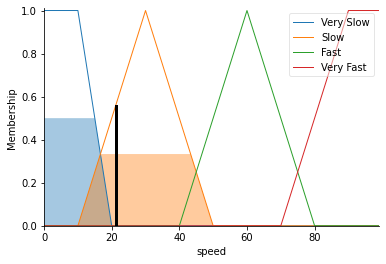

In [25]:
speed_ctrl_sim.input['temparture'] = 30
speed_ctrl_sim.input['cloudiness'] = 70
speed_ctrl_sim.compute()
print("Calculated Speed: ",speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)

Calculated Speed:  30.0


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


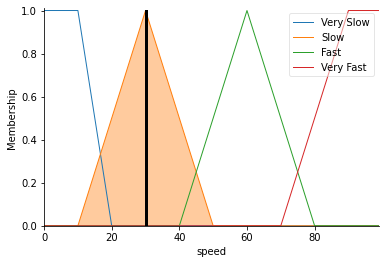

In [26]:
speed_ctrl_sim.input['temparture'] = 30
speed_ctrl_sim.input['cloudiness'] = 50
speed_ctrl_sim.compute()
print("Calculated Speed: ",speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)

Calculated Speed:  71.77346278317151


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


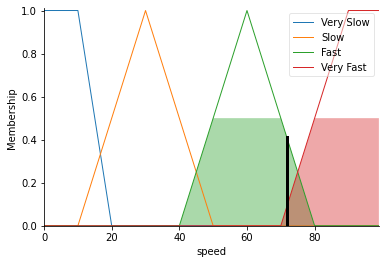

In [27]:
speed_ctrl_sim.input['temparture'] = 80
speed_ctrl_sim.input['cloudiness'] = 30
speed_ctrl_sim.compute()
print("Calculated Speed: ",speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)

Calculated Speed:  86.82638888888887


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


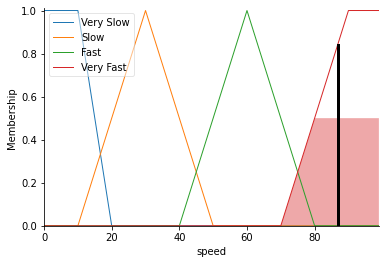

In [28]:
speed_ctrl_sim.input['temparture'] = 90
speed_ctrl_sim.input['cloudiness'] = 30
speed_ctrl_sim.compute()
print("Calculated Speed: ",speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)

Calculated Speed:  88.62280701754386


B:\ComputerScienceProjects\artificial_intelligence\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


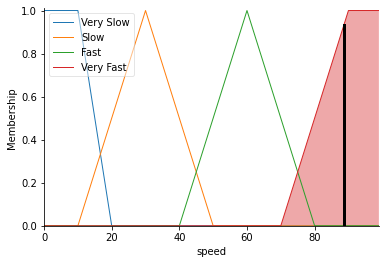

In [29]:
speed_ctrl_sim.input['temparture'] = 90
speed_ctrl_sim.input['cloudiness'] = 20
speed_ctrl_sim.compute()
print("Calculated Speed: ",speed_ctrl_sim.output['speed'])
speed.view(sim=speed_ctrl_sim)